# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [38]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


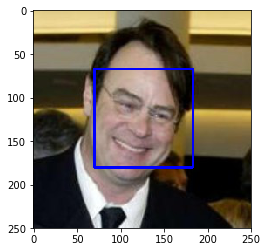

In [81]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [39]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [35]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

humans_detected = 0
dogs_detected = 0

for i in range(0, len(human_files_short)):
    
    test_human = human_files_short[i]
    test_dog = dog_files_short[i]
    
    if face_detector(test_human) == True:
        humans_detected += 1
    if face_detector(test_dog) == True:
        dogs_detected += 1
        
print('% of human faces detected in human images: {:.2f}%'.format((humans_detected / len(human_files_short))*100))
print('% of dogs faces detected in human images: {:.2f}%'.format((dogs_detected / len(human_files_short))*100))

% of human faces detected in human images: 98.00%
% of dogs faces detected in human images: 17.00%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [48]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [12]:
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [77]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path)
    
    #Since VGG16 takes 224x224 images as input, I will resize the input and use augmentation and then convert it to tensor
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.RandomRotation(10),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5, 0.5, 0.5),
                                                             (0.5, 0.5, 0.5))])
    
    #apply data_transform described above to img:
    img = data_transform(img)
    img = img.unsqueeze(0)
    img = Variable(img)

    
    output = VGG16(img.cuda())
    _, prediction = torch.max(output, 1)
    predicted_class = np.squeeze(prediction.numpy()) if not use_cuda else np.squeeze(prediction.cpu().numpy())
    
    #print(predicted_class)

    return predicted_class # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [78]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    class_index = VGG16_predict(img_path)
    if(class_index >= 151 and class_index <= 268):
        return True
    else:
        return False

In [45]:
print(dog_detector(human_files[161]))
print(dog_detector(dog_files[161]))

False
True


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [46]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

humans_detected = 0
dogs_detected = 0

for i in range(0, len(dog_files_short)):
    
    test_human = human_files_short[i]
    test_dog = dog_files_short[i]
    
    if dog_detector(test_human) == True:
        humans_detected += 1
    if dog_detector(test_dog) == True:
        dogs_detected += 1
        
print('% of human faces detected in dog images: {:.2f}%'.format((humans_detected / len(human_files_short))*100))
print('% of dog faces detected in dog images: {:.2f}%'.format((dogs_detected / len(human_files_short))*100))

% of human faces detected in dog images: 1.00%
% of dog faces detected in dog images: 82.00%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [10]:
import torch
import numpy as np
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

use_cuda = torch.cuda.is_available()

if not use_cuda:
    print('Cuda is not available -> training on CPU.')
else:
    print('Cuda is available -> training on GPU.')

Cuda is available -> training on GPU.


In [2]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


num_workers = 0
batch_size = 10
valid_size = 0.2

data_dir = '/data/dog_images'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

#Augmenting the data similar to VGG16 model

data_transforms = {
    'train' : transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])]),

    'valid' : transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])]),

    'test' : transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])])}

#Applying the above transformations to the data
image_datasets = {
    'train' : datasets.ImageFolder(root = train_dir, transform = data_transforms['train']),
    'valid' : datasets.ImageFolder(root = valid_dir, transform = data_transforms['valid']),
    'test' : datasets.ImageFolder(root = test_dir, transform = data_transforms['test'])
}

#Loading the data
data_loaders = {
    'train' : torch.utils.data.DataLoader(image_datasets['train'], batch_size = batch_size, shuffle = True),
    'valid' : torch.utils.data.DataLoader(image_datasets['valid'], batch_size = batch_size),
    'test' : torch.utils.data.DataLoader(image_datasets['test'], batch_size = batch_size)    
}

In [27]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}

print('Number of records of training dataset: {}'.format(dataset_sizes['train']))
print('Number of records of validation dataset: {}'.format(dataset_sizes['valid']))
print('Number of records of test dataset: {}'.format(dataset_sizes['test']))

Number of records of training dataset: 6680
Number of records of validation dataset: 835
Number of records of test dataset: 836


In [5]:
#class names
class_names = image_datasets['train'].classes
print(class_names)

['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Cane_corso', '045.Cardigan_welsh_

In [28]:
#number of classes - to be used for output
n_classes = len(class_names)
print('Number of classes: {}'.format(n_classes))

Number of classes: 133


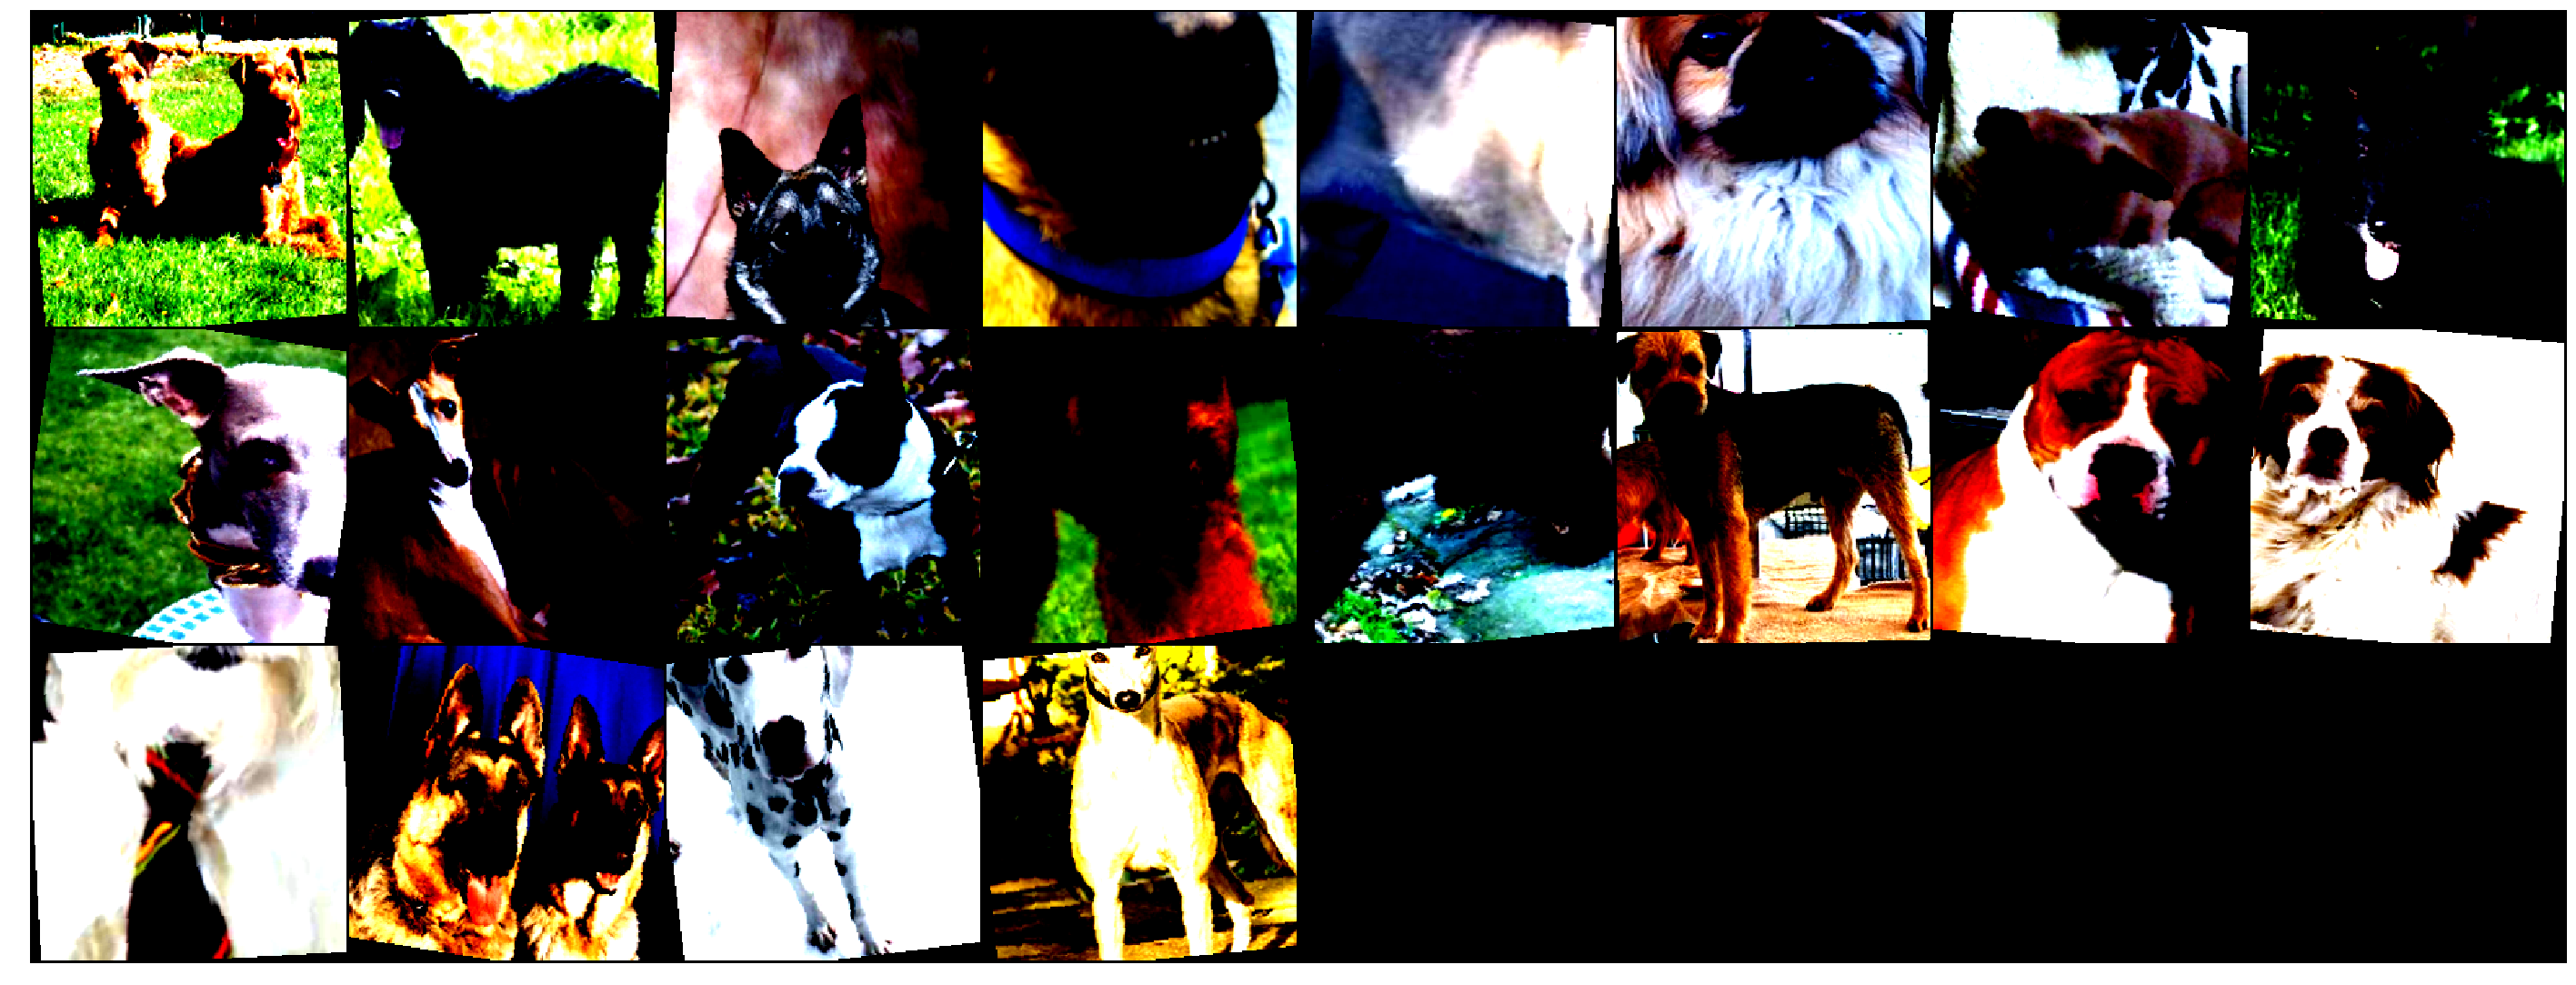

In [8]:
from torchvision import utils
import matplotlib.pyplot as plt

def display_input_images(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    
    fig = plt.figure(figsize=(50, 25))
    plt.axis('off')
    plt.imshow(inp)
    plt.pause(0.001)
    
inputs, classes = next(iter(data_loaders['train']))
grid = utils.make_grid(inputs)
display_input_images(grid)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
* The input images are resized using transforms.Resize(256) and transforms.RandomResizedCrop(224) since the initial images are too big
* I used transforms.RandomHorizontalFlip() and transforms.RandomRotation(10) for augmentation in order to add more positional variety to the dataset so in the training process the algorithm will be robust to geometric changes and learn to generalize better

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [22]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        #convolutional layers:
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding = 1)        
        self.conv5 = nn.Conv2d(128, 256, 3, padding = 1)
        
        #fully connected layers:
        self.fc1 = nn.Linear(7 * 7 * 256, 6272)
        self.fc2 = nn.Linear(6272, 133)
        #the final layer will output 133 classes
        
        #batch normalization (for improving performance of the NN):
        self.batch_norm16 = nn.BatchNorm2d(16)
        self.batch_norm32 = nn.BatchNorm2d(32)
        self.batch_norm64 = nn.BatchNorm2d(64)
        self.batch_norm128 = nn.BatchNorm2d(128)
        self.batch_norm256 = nn.BatchNorm2d(256)
        
        #pooling layer:
        self.pool = nn.MaxPool2d(2, 2)
        
        #dropout:
        self.dropout = nn.Dropout(0.2)
                
    
    def forward(self, x):
        ## Define forward behavior
        
        #passing the input through the first convolutional layer
        x = F.relu(self.batch_norm16(self.conv1(x)))
        #passing the input through a maxpool layer
        x = self.pool(x)

        x = F.relu(self.batch_norm32(self.conv2(x)))
        x = self.pool(x)

        x = F.relu(self.batch_norm64(self.conv3(x)))
        x = self.pool(x)

        x = F.relu(self.batch_norm128(self.conv4(x)))        
        x = self.pool(x)
        
        x = F.relu(self.batch_norm256(self.conv5(x)))        
        x = self.pool(x)


        #flattening:
        x = x.view(-1, 7 * 7 * 256)
        
        #passing the image through the fully connected layers:
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
#model_scratch = Net()

# move tensors to GPU if CUDA is available
#if use_cuda:
#    model_scratch.cuda()

In [23]:
#print(model_scratch)

In [23]:
#apply normal distributon to initial weights for linear layers

def weights_init(m):
    classname = m.__class__.__name__
    
    #for every linear layer, m.weight.data will be taken from the normal distribution
    if classname.find('Linear') != -1:
        #get number of inputs:
        n = m.in_features
        y = 1.0 / np.sqrt(n)
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)

In [24]:
model_scratch_normal = Net()
model_scratch_normal.apply(weights_init)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=12544, out_features=6272, bias=True)
  (fc2): Linear(in_features=6272, out_features=133, bias=True)
  (batch_norm16): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm32): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm64): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm128): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm256): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [25]:
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch_normal.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
*	I decided to use a model with 5 convolutional layers and 2 fully connected layers
*	I used ReLU activation function since it's a common practice in the industry and it's more efficient to use this activation function instead of sigmoid
*	I used 3x3 kernels for the convolutional layers
*	I also used batch normalization because "batch normalization allows each layer of a network to learn by itself a little bit more independently of other layers" (quoted from: https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c)
*	I decided to use dropout before the first fully connected layer since I’m training just for 15 epochs

The feedforward mechanism:
*	The input image has a height and width of 224 x 224 and a depth of 3 
*	The 224 x 224 x 3 input image is passing through the first convolutional layer, conv_1 which produces 16 feature maps so the depth is increased to 16 (new resolution: 224 x 224 x 16)
*	Then, it is passing through the first maxpooling layer, which will reduce the height and width dimension to half and the new resolution is 112 x 112 x 16
*	Conv_2 doubles de depth: 112 x 112 x 32
*	Maxpooling layer to reduce height & width: 56 x 56 x 32
*	Conv_3: 56 x 56 x 64
*	Maxpooling layer: 28 x 28 x 64
*	Conv_4: 28 x 28 x 128
*	Maxpooling layer:  14 x 14 x 128
*	Conv_5 is the last convolutional layer: 14 x 14 x 256
*	The las maxpooling layer will reduce the height and weight to 7 x 7 and the depth stays the same (256)
*	Then, I flattened the input (to a tensor of a 7 * 7* 256 size) in order to pass it through the first fully connected layer and using a 20% dropout
*	I decided to use a normal distribution for the initial weights in the fully connected layers in order to improve model accuracy
*	After passing through fc1, 6272 outputs are produced 
*	These 6272 outputs become the inputs for fc2; fc2 produces the 133 desired classes 
*	For the training process, I used a learning rate of 0.01, the Cross Entropy Loss and the Stochastic Gradient Descent optimizer

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [26]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch_normal.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [27]:
def train(n_epochs, train_loader, valid_loader, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(data_loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            #clear gradients:
            optimizer.zero_grad()
            #fw pass:
            output = model(data)
            #calculate loss:
            loss = criterion(output, target)
            #bw pass:
            loss.backward()
            #update parameters:
            optimizer.step()
            #update training loss:
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(data_loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            #fw pass:
            output = model(data)
            #calcuate loss:
            loss = criterion(output, target)
            #update validation loss:
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # calculate average losses
        train_loss = train_loss/len(data_loaders['train'].dataset)
        valid_loss = valid_loss/len(data_loaders['valid'].dataset)
        
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss   
            
    # return trained model
    return model

In [28]:
# train the model
n_epochs = 15

model_scratch_normal = train(n_epochs, data_loaders['train'], data_loaders['valid'], model_scratch_normal, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch_normal.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 0.000713 	Validation Loss: 0.005405
Validation loss decreased (inf --> 0.005405).  Saving model ...
Epoch: 2 	Training Loss: 0.000677 	Validation Loss: 0.005262
Validation loss decreased (0.005405 --> 0.005262).  Saving model ...
Epoch: 3 	Training Loss: 0.000657 	Validation Loss: 0.004994
Validation loss decreased (0.005262 --> 0.004994).  Saving model ...
Epoch: 4 	Training Loss: 0.000641 	Validation Loss: 0.004899
Validation loss decreased (0.004994 --> 0.004899).  Saving model ...
Epoch: 5 	Training Loss: 0.000630 	Validation Loss: 0.004770
Validation loss decreased (0.004899 --> 0.004770).  Saving model ...
Epoch: 6 	Training Loss: 0.000617 	Validation Loss: 0.004642
Validation loss decreased (0.004770 --> 0.004642).  Saving model ...
Epoch: 7 	Training Loss: 0.000603 	Validation Loss: 0.004678
Epoch: 8 	Training Loss: 0.000592 	Validation Loss: 0.004611
Validation loss decreased (0.004642 --> 0.004611).  Saving model ...
Epoch: 9 	Training Loss: 0.000580 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loader, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(data_loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [29]:
# call test function    
test(data_loaders['test'], model_scratch_normal, criterion_scratch, use_cuda)

Test Loss: 3.359957


Test Accuracy: 20% (172/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [2]:
## TODO: Specify data loaders

import torch
import os
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

num_workers = 0
batch_size = 10
valid_size = 0.2

data_dir = '/data/dog_images'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

#Augmenting the data similar to VGG16 model

data_transforms = {
    'train' : transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])]),

    'valid' : transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])]),

    'test' : transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])])}

#Applying the above transformations to the data
image_datasets = {
    'train' : datasets.ImageFolder(root = train_dir, transform = data_transforms['train']),
    'valid' : datasets.ImageFolder(root = valid_dir, transform = data_transforms['valid']),
    'test' : datasets.ImageFolder(root = test_dir, transform = data_transforms['test'])
}

#Loading the data
data_loaders = {
    'train' : torch.utils.data.DataLoader(image_datasets['train'], batch_size = batch_size, shuffle = True),
    'valid' : torch.utils.data.DataLoader(image_datasets['valid'], batch_size = batch_size),
    'test' : torch.utils.data.DataLoader(image_datasets['test'], batch_size = batch_size)    
}

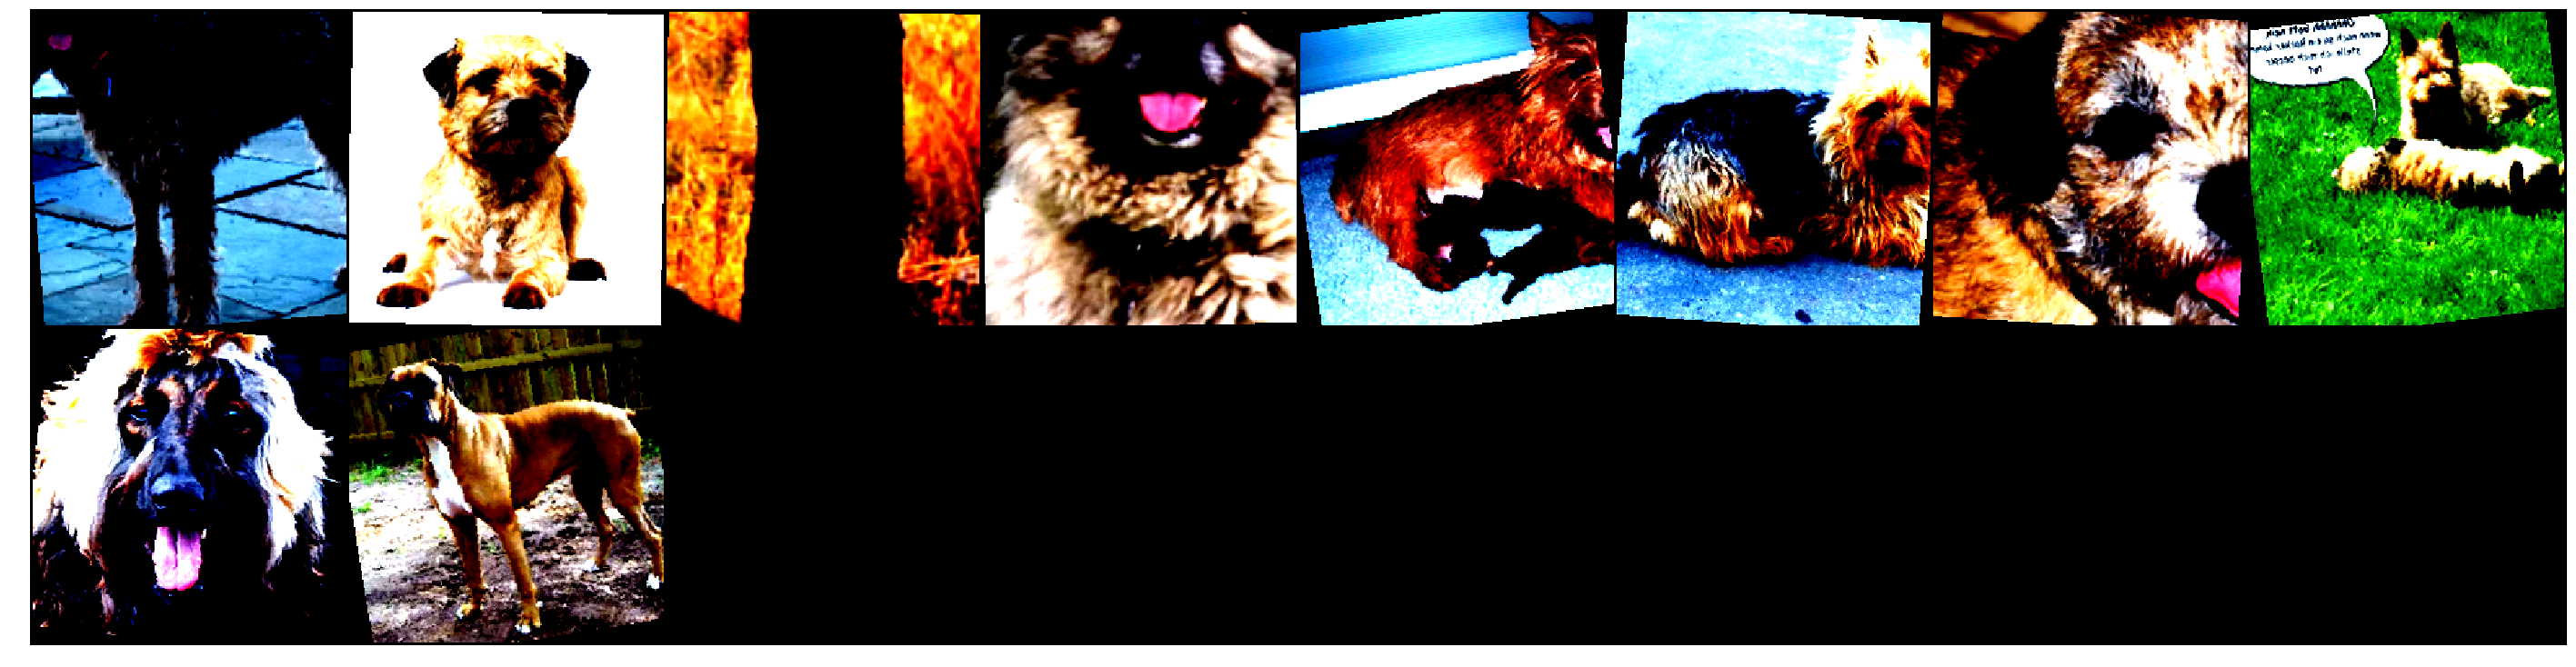

In [4]:
import numpy as np
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

from torchvision import utils
import matplotlib.pyplot as plt

def display_input_images(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    
    fig = plt.figure(figsize=(50, 25))
    plt.axis('off')
    plt.imshow(inp)
    plt.pause(0.001)
    
inputs, classes = next(iter(data_loaders['train']))
grid = utils.make_grid(inputs)
display_input_images(grid)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [8]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
vgg16 = models.vgg16(pretrained = True)

#Freeze pre-trained weights
for param in vgg16.features.parameters():
    param.required_grad = False
    
#Obtain the number of inputs for the last layer:
n_inputs = vgg16.classifier[6].in_features

#Modify the last layer so it outputs the 133 classes:
last_layer = nn.Linear(n_inputs, 133)
vgg16.classifier[6] = last_layer

In [67]:
#moving model to GPU:
use_cuda = torch.cuda.is_available()
if use_cuda:
    vgg16 = vgg16.cuda()

In [10]:
#print model architecture
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

* I decided to use VGG16 model since it was trained on the ImageNet dataset (which is a large dataset) and is able to generalize very well.
* It has 16 layers as follows: a sequence of 3x3 convolutions broken up by 2x2 pooling layers and finished with 3 fully connected layers. It uses 3x3 convolution windows 

Steps:
* First, I loaded in the pre-trained VGG16 model
* Then, I froze all the parameters so that this neural network can act as a feature extractor for my dataset (the parameters from the pre-trained model will not be changed during training)
* VGG16 outputs 1000 classes so I modified the final layer by replacing it with a fully connected layer which outputs 133 classes

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [14]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(vgg16.classifier.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [17]:
# train the model
n_epochs = 15

vgg16 = train(n_epochs, data_loaders['train'], data_loaders['valid'], vgg16, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
vgg16.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.000567 	Validation Loss: 0.001878
Validation loss decreased (inf --> 0.001878).  Saving model ...
Epoch: 2 	Training Loss: 0.000302 	Validation Loss: 0.000899
Validation loss decreased (0.001878 --> 0.000899).  Saving model ...
Epoch: 3 	Training Loss: 0.000238 	Validation Loss: 0.000717
Validation loss decreased (0.000899 --> 0.000717).  Saving model ...
Epoch: 4 	Training Loss: 0.000213 	Validation Loss: 0.000624
Validation loss decreased (0.000717 --> 0.000624).  Saving model ...
Epoch: 5 	Training Loss: 0.000200 	Validation Loss: 0.000600
Validation loss decreased (0.000624 --> 0.000600).  Saving model ...
Epoch: 6 	Training Loss: 0.000188 	Validation Loss: 0.000554
Validation loss decreased (0.000600 --> 0.000554).  Saving model ...
Epoch: 7 	Training Loss: 0.000183 	Validation Loss: 0.000558
Epoch: 8 	Training Loss: 0.000174 	Validation Loss: 0.000532
Validation loss decreased (0.000554 --> 0.000532).  Saving model ...


KeyboardInterrupt: 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [21]:
test(data_loaders['test'], vgg16, criterion_transfer, use_cuda)

Test Loss: 0.504865


Test Accuracy: 82% (691/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [35]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_loaders['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([transforms.Resize(256),
                                               transforms.CenterCrop(224),
                                               transforms.ToTensor(),
                                               transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                                    std=[0.229, 0.224, 0.225])])

    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    image = image.cuda()
    
    #applying the VGG16 model defined at step4
    vgg16.eval()
    idx = torch.argmax(vgg16(image))
    return class_names[idx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [82]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    # Display the image    
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
        
    if(dog_detector(img_path)):
        prediction = predict_breed_transfer(img_path)
        print("I detect a dog. Breed " + str(prediction))
    elif(face_detector(img_path)):
        prediction = predict_breed_transfer(img_path)
        print("I detect a human. You look like a " + str(prediction))
    else:
        print("I don't know what this is.")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The algorithm mistakes one human for a dog [I detect a dog. Breed Norfolk terrier].

Possible improvements:
* Fine-tune the hyperparameters
* Try a different network architecture
* Train the network for more epochs in order to save a model with lower validation loss
* Add more data augmentation [duplicate some images and keep in the training dataset the original images as well as apply augmentation on duplicated ones] so that the model can learn generalize better
* Use a different optimizer (Adam) and a different learning rate

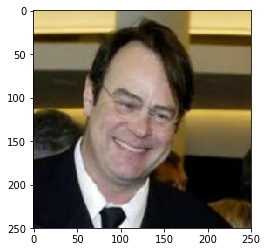

I detect a human. You look like a American foxhound


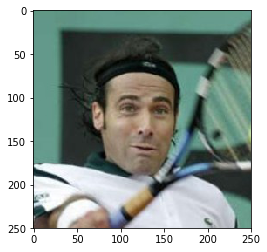

I detect a human. You look like a Dachshund


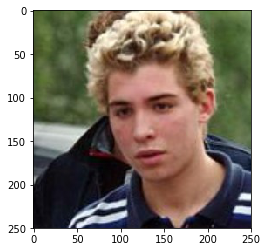

I detect a dog. Breed Norfolk terrier


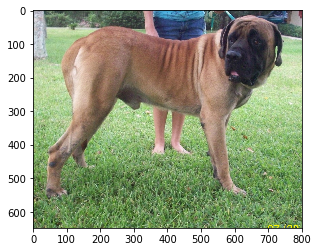

I detect a dog. Breed Bullmastiff


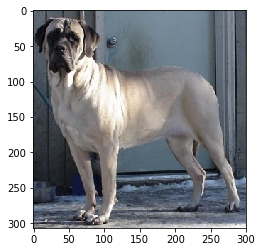

I detect a dog. Breed Bullmastiff


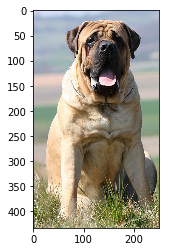

I detect a dog. Breed Bullmastiff


In [83]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)